In [4]:
# tensorflow
# google 만든 머신러닝을 위한 library( python, c )
# tensorflow를 이용해 보아요!
# Hello World를 출력해 보아요!
import tensorflow as tf

# tensorflow의 구성요소(3가지)
# 1. node : 수학적인 연산을 담당, 데이터의 입출력
# 2. Tensor : 다차원 array(matrix)
# 3. edge : 한 node가 가지고 있는 tensor를 다른 node로 이동

my_node = tf.constant("Hello World")

sess = tf.Session()  # session, runner(node를 실행시키는 놈)

print(sess.run(my_node).decode())

Hello World


In [8]:
import tensorflow as tf
import numpy as np

node1 = tf.constant(10, dtype=tf.float32)
node2 = tf.constant(20, dtype=tf.float32)

node3 = node1 + node2 # tf.add(node1,node2)

sess = tf.Session()

sess.run([node1,node2,node3])

[10.0, 20.0, 30.0]

In [12]:
# placeholder ( 데이터를 받아들이는 그릇 )
import tensorflow as tf

node1 = tf.placeholder(dtype=tf.float32)
node2 = tf.placeholder(dtype=tf.float32)

node3 = node1 + node2

sess = tf.Session()
# sess.run(node3, feed_dict={node1:input(), node2:input()})
sess.run(node3, feed_dict={node1:[1,2,3], node2:[10,11,12]})


array([11., 13., 15.], dtype=float32)

In [15]:
import tensorflow as tf

# node1 = tf.constant(3, dtype=tf.float32)
# node1
node1 = tf.constant([1,2,3], dtype=tf.float32)
node1

<tf.Tensor 'Const_14:0' shape=(3,) dtype=float32>

In [19]:
# 간단한 linear regression을 이용한 machine learning
import tensorflow as tf

# training data set
x_data = [1,2,3]  # 독립변수, 입력데이터
y_data = [3,5,7]  # 종속변수, 입력데이터의 label

# placeholder
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# Weight & bias 정의
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis ( 우리가 최종적으로 알아내야 하는 직선 )
#              데이터에 가장 인접한 직선
#              예측모델이 만들어졌으니 prediction이 가능
H = W * x + b

# Cost function(Loss function, 비용함수)
# Cost function이 최소가 되는 W와 b값을 구하는 것이 목적
cost = tf.reduce_mean(tf.square(H - y))

# cost function의 minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# 그래프를 실행시키기 위한 session
sess = tf.Session()
# Variable을 사용할 경우 초기화를 시켜줘야 해요!!
sess.run(tf.global_variables_initializer())

for step in range(3000):
    _, w_val, b_val, cost_val = sess.run([train,W,b,cost],
                                        feed_dict={x:x_data, y:y_data})
    if step % 300 == 0: # 300번 반복될때마다 출력
        print("w:{},b:{},cost:{}".format(w_val,b_val,cost_val))

##### Prediction
sess.run(H, feed_dict={x:10})

w:[0.50095165],b:[-1.6746306],cost:42.499759674072266
w:[2.360798],b:[0.17982095],cost:0.09696769714355469
w:[2.17526],b:[0.60159266],cost:0.022880464792251587
w:[2.0851336],b:[0.8064714],cost:0.005398837383836508
w:[2.041355],b:[0.9059917],cost:0.0012739243684336543
w:[2.020088],b:[0.95433503],cost:0.0003005896869581193
w:[2.0097578],b:[0.9778179],cost:7.092850137269124e-05
w:[2.0047405],b:[0.9892244],cost:1.6738096746848896e-05
w:[2.0023036],b:[0.994764],cost:3.9526903492514975e-06
w:[2.0011203],b:[0.9974542],cost:9.343953024654184e-07


array([21.004223], dtype=float32)

cost : 516.58544921875
cost : 4.522102355957031
cost : 4.343588352203369
cost : 4.2141194343566895
cost : 4.1202263832092285
cost : 4.052131175994873
cost : 4.002747535705566
cost : 3.966930389404297
cost : 3.9409542083740234
cost : 3.922116756439209


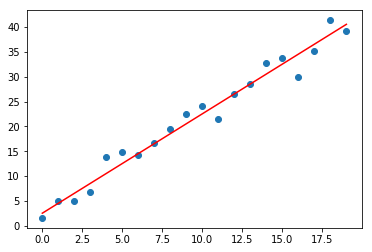

array([32.529766], dtype=float32)

In [14]:
%matplotlib inline
### 기본적인 linear regression 예제
import tensorflow as tf # tensorflow module 불러들여요
import matplotlib
import matplotlib.pyplot as plt
import numpy as np 

np.random.seed(12345)
# training data set 
x_data = np.arange(0,20,1)
y_data = np.array([ t*2 + np.random.normal(2,2) for t in x_data ])
# 일단 눈으로 먼저 확인을 해 보아요!!
plt.scatter(x_data,y_data)

# placeholder
X = tf.placeholder(dtype=tf.float32)
Y = tf.placeholder(dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis
H = W * X + b

# cost function
cost = tf.reduce_mean(tf.square(H-Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

# session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(3000):
    _, cost_val = sess.run([train,cost], feed_dict={X:x_data,Y:y_data})
    if step % 300 == 0:
        print("cost : {}".format(cost_val))

# 입력데이터에 대한 처리가 이루어져야 정상적으로 학습이 진행
# 될 수 있어요!! ( 조금 이따가 얘기해요 !! )
# 만약 학습이 정상적으로 이루어졌으면 W,b값이 결정되게 되요!
x_line = np.arange(0,20,1)
y_line = np.array([ sess.run(W) * t + sess.run(b) for t in x_line])
# print(y_line)
plt.plot(x_line,y_line,"r")
plt.show()
# Prediction
sess.run(H, feed_dict={X:15})
        

In [40]:
### ozone데이터를 이용한 multiple linear regression
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## 1. Data Loading
data = pd.read_csv("./data/ozone/ozone.csv", sep=",")
df = data.dropna(how="any", inplace=False) # 111개의 행
display(df.head())
# 2. training data set
x_data = MinMaxScaler().fit_transform(
            df[["Solar.R","Wind","Temp"]].values)
y_data = MinMaxScaler().fit_transform(
        df["Ozone"].values.reshape(-1,1))
x_data
# 3. 


,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
6,23.0,299.0,8.6,65,5,7


array([[0.55963303, 0.27717391, 0.25      ],
       [0.33944954, 0.30978261, 0.375     ],
       [0.43425076, 0.55978261, 0.425     ],
       [0.93577982, 0.5       , 0.125     ],
       [0.89296636, 0.3423913 , 0.2       ],
       [0.28134557, 0.625     , 0.05      ],
       [0.03669725, 0.9673913 , 0.1       ],
       [0.76146789, 0.40217391, 0.3       ],
       [0.86544343, 0.375     , 0.225     ],
       [0.81651376, 0.4673913 , 0.275     ],
       [0.17737003, 0.5923913 , 0.025     ],
       [1.        , 0.5       , 0.175     ],
       [0.91743119, 0.52717391, 0.225     ],
       [0.21712538, 0.875     , 0.        ],
       [0.96330275, 0.5       , 0.275     ],
       [0.11314985, 0.40217391, 0.125     ],
       [0.0030581 , 0.40217391, 0.05      ],
       [0.95718654, 0.77717391, 0.4       ],
       [0.05504587, 0.40217391, 0.1       ],
       [0.25993884, 0.52717391, 0.1       ],
       [0.01834862, 0.52717391, 0.25      ],
       [0.74923547, 0.68478261, 0.6       ],
       [0.

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
6,23.0,299.0,8.6,65,5,7
7,19.0,99.0,13.8,59,5,8
8,8.0,19.0,20.1,61,5,9
11,16.0,256.0,9.7,69,5,12
12,11.0,290.0,9.2,66,5,13
13,14.0,274.0,10.9,68,5,14


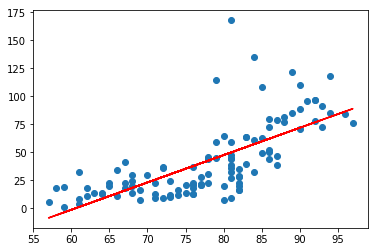

In [32]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

# Data Loading
data = pd.read_csv("./data/ozone/ozone.csv", sep=",")
df = data.dropna(how="any", inplace=False)
display(df)
# 독립변수와 종속변수를 뽑아요
x = df["Temp"]
y = df["Ozone"]

result = stats.linregress(x,y)
w = result[0]
b = result[1]
plt.scatter(x,y)
plt.plot(x,w*x+b,"r")
plt.show()

In [ ]:
# multiple linear regression
import tensorflow as tf

# training data set
x_data = [[73,80,75],
          [93,88,93],
          [89,91,90],
          [96,98,100],
          [73,66,70]]

y_data = [[152],
          [185],
          [180],
          [196],
          [142]]

# placeholder
X = tf.placeholder(shape=[None,3],dtype=tf.float32)
Y = tf.placeholder(shape=[None,1],dtype=tf.float32)

# weight & bias
W = tf.Variable(tf.random_normal([3,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis
# H = W * x + b
H = tf.matmul(X,W) + b

# 그 다음부터는 동일과정 진행



Cost : 0.2827492952346802
Cost : 0.04800090938806534
Cost : 0.0436614528298378
Cost : 0.04354085773229599
Cost : 0.043537504971027374
Cost : 0.04353741556406021
Cost : 0.04353741183876991
Cost : 0.04353741928935051
Cost : 0.04353741928935051
Cost : 0.04353741928935051


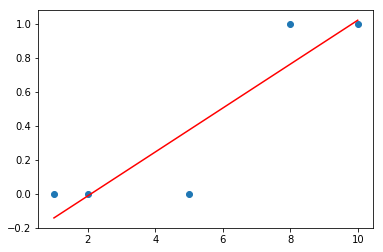

array([5.973681], dtype=float32)

In [5]:
### Simple Linear Regression
import tensorflow as tf
import matplotlib 
import matplotlib.pyplot as plt

# training data set
x_data = [1,2,5,8,10]
y_data = [0,0,0,1,1]

# placeholder
X = tf.placeholder(dtype=tf.float32)
Y = tf.placeholder(dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis
H = W * X + b

# Cost(Loss) function - 최소제곱법
# Cost 함수의 값이 최소가 되는 W,b를 찾는게 목적
cost = tf.reduce_mean(tf.square(H-Y))

# train node를 생성
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(3000):
    _, cost_val = sess.run([train,cost], 
                           feed_dict={X:x_data, Y:y_data})
    if step % 300 == 0:
        print("Cost : {}".format(cost_val))

plt.scatter(x_data,y_data)
plt.plot(x_data, sess.run(W)*x_data + sess.run(b),"r")
plt.show()
x = (0.5 - sess.run(b)) / sess.run(W) 
x

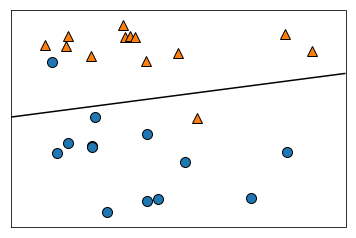

In [18]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mglearn   # Sample Data를 가져오기 위한 utility module
from sklearn.linear_model import LogisticRegression
import warnings  # warning제어를 목적으로 사용

# warning을 표시하지 않아요
warnings.filterwarnings(action="ignore") 

# x : x parameter( 2개 )
# y : label ( 0 or 1 )
x,y = mglearn.datasets.make_forge()
# print(x)

mglearn.discrete_scatter(x[:,0], x[:,1], y)
model = LogisticRegression()
clf = model.fit(x,y)

mglearn.plots.plot_2d_separator(clf,x,fill=False, eps=0.5)

In [26]:
### Tensorflow를 이용한 Logistic Regression
import tensorflow as tf

# Data Loading
# 파일이나 network를 통해서 데이터를 로딩한 후 전처리 과정

# training data set ( 2차원 matrix )
x_data = [[10,0],
          [8,1],
          [3,3],
          [2,3],
          [5,1],
          [2,0],
          [1,0]]
y_data = [[1],[1],[1],[1],[0],[0],[0]]

# placeholder
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([2,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis
logit = tf.matmul(X,W) + b
H = tf.sigmoid(logit)

# Cost function
# cost = -tf.reduce_mean( y * tf.log(H) + (1-Y) * tf.log(1-H))
cost = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(logits=logit, 
                                            labels=Y))
# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(3000):
    _, cost_val = sess.run([train,cost], feed_dict={X:x_data,
                                                   Y:y_data})
    if step % 300 == 0:
        print("cost : {}".format(cost_val))

# 우리가 만든 모델이 얼마나 정확한지를 측정
# accuracy
predict = tf.cast( H > 0.5, dtype=tf.float32)
correct = tf.equal(predict, Y)
accuracy = tf.reduce_mean(tf.cast(correct,dtype=tf.float32))

print("정확도 : {}".format(sess.run(accuracy,
                                 feed_dict={X:x_data, Y:y_data})))

# prediction
print("예측값 : {}".format(sess.run(predict, 
                                 feed_dict={X:[[3,1]]})))

cost : 1.6460025310516357
cost : 0.5601195693016052
cost : 0.49234142899513245
cost : 0.4417272210121155
cost : 0.40330055356025696
cost : 0.3735801577568054
cost : 0.35011354088783264
cost : 0.33119654655456543
cost : 0.3156454265117645
cost : 0.30263060331344604
정확도 : 0.8571428656578064
예측값 : [[0.]]


In [ ]:
#### Logistic Regression ( Binary Classification )
### 정리!!

## download : http://tagme.to/moon9342/logistic
## 실습예제 1. - Titanic
## 실습예제 2. - Admission
##               주어진 데이터의 70%를 training용으로 사용
##               나머지 30%를 test용으로 사용

In [52]:
### Titanic 분석 ( Tensorflow )
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

## 1. Data Loading
data = pd.read_csv("./data/titanic/titanic_data.csv", sep=",")
data_x = data[["Sex","Age","Pclass","Fare"]]
data_y = data["Survived"]
Pclass_dummies = pd.get_dummies(data_x["Pclass"], 
                                prefix="Pclass")
data_x = data_x.join(Pclass_dummies)
data_x.drop("Pclass", axis=1, inplace=True)
Sex_dummies = pd.get_dummies(data_x["Sex"], prefix="Sex")
data_x = data_x.join(Sex_dummies)
data_x.drop("Sex", axis=1, inplace=True)

# training data set
x_data = MinMaxScaler().fit_transform(data_x.values)
y_data = data_y.values.reshape(-1,1)
# x_data.shape ( 891,7 )

# placeholder
X = tf.placeholder(shape=[None,7], dtype=tf.float32)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([7,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis
logit = tf.matmul(X,W) + b
H = tf.sigmoid(logit)

# cost function
cost = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(logits=logit, 
                                            labels=Y))
# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(10000):
    _, cost_val = sess.run([train,cost], feed_dict={X:x_data,
                                                   Y:y_data})
    if step % 1000 == 0:
        print("Cost : {}".format(cost_val))

# accuracy 측정
predict = tf.cast( H > 0.5, dtype=tf.float32)
correct = tf.equal(predict, Y) 
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

print("정확도 : {}".format(sess.run(accuracy, feed_dict={X:x_data, 
                                                     Y:y_data})))


Cost : 0.7142138481140137
Cost : 0.496805340051651
Cost : 0.47965821623802185
Cost : 0.4734089970588684
Cost : 0.4704672694206238
Cost : 0.46870672702789307
Cost : 0.46742314100265503
Cost : 0.4663620591163635
Cost : 0.46542492508888245
Cost : 0.46457090973854065
정확도 : 0.7833894491195679


In [104]:
### Machine Learning - Admission ( TensorFlow )
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

## 1. Data Loading
data = pd.read_csv("./data/admission/admission.csv", sep=",")

data_x = data.drop("admit",axis=1)
data_y = data["admit"]
rank_dummies = pd.get_dummies(data_x["rank"], 
                                prefix="rank")
data_x = data_x.join(rank_dummies)
data_x.drop("rank", axis=1, inplace=True)

total_data_x = MinMaxScaler().fit_transform(data_x.values)
total_data_y = data_y.values.reshape(-1,1)
count = int(total_data_x.shape[0] * 0.7)

# training data set
training_x_data = total_data_x[:count,:]
training_y_data = total_data_y[:count,:]
# testing data set
testing_x_data = total_data_x[count:,:]
testing_y_data = total_data_y[count:,:]

# placeholder
X = tf.placeholder(shape=[None,6], dtype=tf.float32)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([6,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis
logit = tf.matmul(X,W) + b
H = tf.sigmoid(logit)

# cost function
cost = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(logits=logit, 
                                            labels=Y))
# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(50000):
    _, cost_val = sess.run([train,cost], feed_dict={X:training_x_data,
                                                   Y:training_y_data})
    if step % 5000 == 0:
        print("Cost : {}".format(cost_val))

# accuracy 측정
predict = tf.cast( H > 0.5, dtype=tf.float32)
correct = tf.equal(predict, Y) 
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

print("정확도 : {}".format(sess.run(accuracy, feed_dict={X:testing_x_data, 
                                                     Y:testing_y_data})))
# print("정확도 : {}".format(sess.run(accuracy, feed_dict={X:training_x_data, 
#                                                       Y:training_y_data})))

Cost : 0.7911784648895264
Cost : 0.5480604767799377
Cost : 0.5478910207748413
Cost : 0.5478899478912354
Cost : 0.5478899478912354
Cost : 0.5478899478912354
Cost : 0.5478899478912354
Cost : 0.5478899478912354
Cost : 0.5478899478912354
Cost : 0.5478899478912354
정확도 : 0.6833333373069763


In [105]:
### statsmodel.api
import tensorflow as tf
import numpy as np
import pandas as pd
import statsmodels.api as sm # conda install statsmodels
from sklearn.preprocessing import MinMaxScaler
## 1. Data Loading
data = pd.read_csv("./data/admission/admission.csv", sep=",")
data_x = data.drop("admit",axis=1)
data_y = data["admit"]
rank_dummies = pd.get_dummies(data_x["rank"], 
                                prefix="rank")
data_x = data_x.join(rank_dummies)
data_x.drop("rank", axis=1, inplace=True)
logit = sm.Logit(data_y,data_x) # 모델생성
result = logit.fit()  # 학습과정
result.predict(data_x) # 예측
# mask = result.predict(data_x) > 0.5
# data_y[mask].shape # 49
# data_y[mask].sum() # 30
# print("{}".format(30/49))

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6
0.6122448979591837


In [ ]:
## Machine Learning
## - Supervised Learning   ( 지도학습 )
##   - training data set에 label이 붙어 있어요!!
##   => 1. Simple Linear Regression
##      독립변수(입력 parameter)가 1개인것을 지칭
##       Hypothesis => H = W * x + b, Cost fucntion
##   => 2. Multiple Linear Regression 
##      독립변수(입력 parameter)가 2개이상인것을 지칭
##      Hypothesis => H = XW + b
##   => 3. Logistic Regression ( lable이 0 or 1 )
##      실제로 현실에서 많이 이용되고 있는 학습모델
##      정확도를 측정가능.
##      다른말로 binary classification
##      Hypothesis => sigmoid(XW + b)
##     
## - UnSupervised Learning ( 비지도학습 )
##   - training data set에 label이 붙어 있지 않은경우!!

In [23]:
## Multinomial Classification
import tensorflow as tf

# 1. data loading

# 2. training data set
x_data = [[10,7,8,5],
          [8,8,9,4],
          [7,8,2,3],
          [6,3,9,3],
          [7,5,7,4],
          [3,5,6,2],
          [2,4,3,1]
         ]
y_data = [[1,0,0], 
          [1,0,0],
          [0,1,0],
          [0,1,0],
          [0,1,0],
          [0,0,1],
          [0,0,1],
         ]

# placeholder
X = tf.placeholder(shape=[None,4], dtype=tf.float32)
Y = tf.placeholder(shape=[None,3], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([4,3]), name="weight")
b = tf.Variable(tf.random_normal([3]), name="bias")

# Hypothesis
logit = tf.matmul(X,W) + b
H = tf.nn.softmax(logit)

# Cost(Loss) function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit,
                                                                labels=Y))
# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(3000):
    _, cost_val = sess.run([train,cost], feed_dict={X:x_data,
                                                   Y:y_data})
    if step % 300 == 0:
        print("cost : {}".format(cost_val))

# Accuracy
predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

print("정확도 : {}".format(sess.run(accuracy, feed_dict={X:x_data,
                                                     Y:y_data})))
# 예측
result = sess.run(predict, feed_dict={X:[[5,8,3,4]]})
print(result)

cost : 3.5164682865142822
cost : 0.7861059308052063
cost : 0.7078590393066406
cost : 0.658867359161377
cost : 0.6201901435852051
cost : 0.5873222351074219
cost : 0.5583909749984741
cost : 0.5323972105979919
cost : 0.5087361931800842
cost : 0.48700910806655884
정확도 : 0.8571428656578064
[1]


In [51]:
### BMI 예제 ( multinomial classification )

import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import warnings

# warning을 출력하지 않도록 지정
warnings.filterwarnings(action="ignore")

# 1. Data Loading
data = pd.read_csv("./data/bmi/bmi.csv", sep=",", skiprows=3)
# 결치값 제거
data = data.dropna(how="any")
# training data, testing data
num_of_data = int(data.shape[0]*0.7)

data_train = data.loc[:num_of_data,:]
data_test = data.loc[num_of_data:,:]

df_train_x = data_train[["height","weight"]]
df_train_y = data_train["label"]
df_test_x = data_test[["height","weight"]]
df_test_y = data_test["label"]

sess = tf.Session()
# 2. training data set
scaler = MinMaxScaler()
train_x_data = scaler.fit_transform(df_train_x.values)
# train_y_data = tf.one_hot(df_train_y,3).eval(session=sess)
train_y_data = sess.run(tf.one_hot(df_train_y,3))
# testing data set
test_x_data = scaler.transform(df_test_x.values)
test_y_data = tf.one_hot(df_test_y,3).eval(session=sess)

# 3. Placeholder
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
Y = tf.placeholder(shape=[None,3], dtype=tf.float32)

# 4. Weight & bias
W = tf.Variable(tf.random_normal([2,3]), name="weight")
b = tf.Variable(tf.random_normal([3]), name="bias")

# 5. Hypothesis
logit = tf.matmul(X,W) + b
H = tf.nn.softmax(logit)

# 6. cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=Y))

# 7. train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# 8. 초기화
sess.run(tf.global_variables_initializer())

# 9. 학습
for step in range(3000):
    _, cost_val = sess.run([train,cost], feed_dict={X:train_x_data,
                                                   Y:train_y_data})
    if step % 300 == 0:
        print("cost : {}".format(cost_val))
        
# accuracy
predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct,dtype=tf.float32))

print("정확도 : {}".format(sess.run(accuracy, feed_dict={X:test_x_data,
                                                      Y:test_y_data})))
# prediction
print("예측값 : {}".format(sess.run(H, 
                                 feed_dict={X:scaler.transform([[188,75]])})))

cost : 2.6160988807678223
cost : 0.6999130845069885
cost : 0.5821584463119507
cost : 0.5189303159713745
cost : 0.4770132303237915
cost : 0.4460597336292267
cost : 0.4217183291912079
cost : 0.40179136395454407
cost : 0.3850152790546417
cost : 0.37059810757637024
정확도 : 0.9495000243186951
예측값 : [[0.16072062 0.68438685 0.15489258]]


In [73]:
##### MNIST - Multinomial Classification
##### 입력데이터 - 이미지에 대한 pixel data가 들어와요!\
##### 원래 이미지 데이터는 3차원 데이터인데 흑백이고
##### 2차원 데이터를 1차원으로 변환해서 입력을 받아요!
##### 약 5만5천개의 이미지를 입력으로 받아요!
##### 입력데이터(x parameter)의 shape => ( 55000, 784)
##### y측 label의 shape => ( 55000, 10)
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# 1. Data Loading
mnist = input_data.read_data_sets("./data/mnist", one_hot=True)

# 2. Placeholder
X = tf.placeholder(shape=[None,784], dtype=tf.float32)
Y = tf.placeholder(shape=[None,10], dtype=tf.float32)

# 3. Wegiht & bias
W = tf.Variable(tf.random_normal([784,10]), name="weight")
b = tf.Variable(tf.random_normal([10]), name="bias")

# 4. Hypothesis
logit = tf.matmul(X,W) + b
H = tf.nn.softmax(logit)

# 5. Cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit,
                                                                labels=Y))
# 6. train
train = tf.train.GradientDescentOptimizer(learning_rate=1).minimize(cost)

# 7. Session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 8. 학습
train_epoch = 30
batch_size = 100 # 한번에 읽어들일 데이터의 크기

for step in range(train_epoch):
    num_of_iter = int(mnist.train.num_examples / batch_size)
    
    for i in range(num_of_iter):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([train,cost],feed_dict={X:batch_x,
                                                      Y:batch_y})
    if step % 3 == 0:
        print("Cost : {}".format(cost_val)) 
        
# accuracy
predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

# 정확도 출력
print("정확도 : {}".format(sess.run(accuracy,feed_dict={X:mnist.test.images,
                                                    Y:mnist.test.labels})))

Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
Cost : 0.8217409253120422
Cost : 0.736920952796936
Cost : 0.5433945655822754
Cost : 0.22439277172088623
Cost : 0.2708527743816376
Cost : 0.14699268341064453
Cost : 0.24060222506523132
Cost : 0.19769227504730225
Cost : 0.3195491433143616
Cost : 0.20795661211013794
정확도 : 0.9126999974250793
